In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_df = pd.read_csv('data/bmi_train.csv')
train_df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [3]:
test_df = pd.read_csv('data/bmi_validation.csv')
test_df.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


In [4]:
train_df.shape

(400, 4)

In [5]:
train_df.describe()

,Height,Weight,Index
count,400.000000,400.000000,400.000000
mean,170.362500,106.060000,3.737500
std,16.574011,32.362242,1.370507
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,106.500000,4.000000
75%,184.000000,136.250000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
train_df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

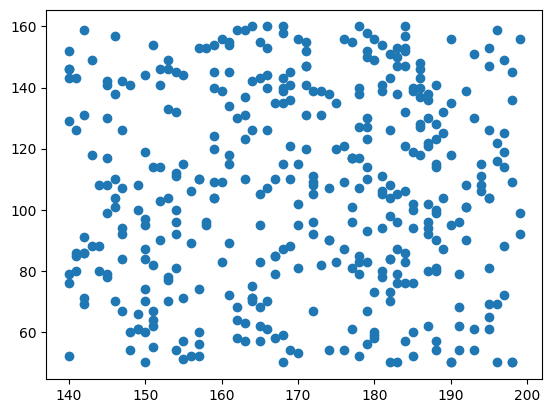

In [7]:
plt.scatter(train_df['Height'],train_df['Weight'])

In [8]:
ohe = OneHotEncoder()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the Gender column
encoded = encoder.fit_transform(train_df[['Gender']])

# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate with the original DataFrame (excluding the original Gender column)
df_encoded = pd.concat([train_df.drop('Gender', axis=1), encoded_df], axis=1)

/home/bastin/envs/ml_ppl/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
df_encoded.head(10)

,Height,Weight,Index,Gender_Female,Gender_Male
0,161,89,4,0.0,1.0
1,179,127,4,0.0,1.0
2,172,139,5,0.0,1.0
3,153,104,5,0.0,1.0
4,165,68,2,0.0,1.0
5,172,92,4,0.0,1.0
6,182,108,4,0.0,1.0
7,179,130,5,0.0,1.0
8,142,71,4,0.0,1.0
9,158,153,5,1.0,0.0


In [28]:
scaler = StandardScaler()

scaled_hw = pd.DataFrame(scaler.fit_transform(df_encoded[['Height', 'Weight']]), columns = ['Height', 'Weight'])

final_df = pd.concat([scaled_hw, df_encoded.drop(columns=['Height','Weight'],axis=1)],axis=1)
final_df.head()

In [12]:
#train

X = final_df.drop(columns=['Index'], axis=1).values
y = final_df['Index'].values

In [20]:
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print(f'Accuracy: {accuracy*100}%')

Accuracy: 92.5%


In [23]:
import pickle

In [24]:
with open('models/random_forest_classifier_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [27]:
with open('models/random_forest_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('preprocess_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

test_df = pd.read_csv('data/bmi_validation.csv')

In [29]:
test_df_encoded = pd.get_dummies(test_df, columns=['Gender'])
scaled_hw = pd.DataFrame(scaler.transform(test_df_encoded[['Height', 'Weight']]), columns = ['Height', 'Weight'])

final_test_df = pd.concat([scaled_hw, test_df_encoded.drop(columns=['Height','Weight'],axis=1)],axis=1)
final_test_df.head()

,Height,Weight,Gender_Female,Gender_Male
0,-0.470733,-0.085021,False,True
1,0.759518,-0.947551,False,True
2,0.371018,-0.331458,False,True
3,0.694768,-0.085021,True,False
4,1.536519,1.054751,True,False


In [30]:
preds = model.predict(final_test_df.values)

In [32]:
dict_bmi = {0: 'Extremly Weak',
            1:'Weak',
            2 :'Normal',
            3:'Overweight',
            4:'Obesity',
            5:'Extremly Obese'
            }

for pred in preds:
    print(f'{dict_bmi[pred]} \n')

Extremly Obese 

Extremly Obese 

Extremly Obese 

Obesity 

Overweight 

Overweight 

Extremly Obese 

Overweight 

Overweight 

Extremly Obese 

Overweight 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Overweight 

Overweight 

Overweight 

Extremly Obese 

Extremly Obese 

Overweight 

Overweight 

Overweight 

Extremly Obese 

Overweight 

Extremly Obese 

Extremly Obese 

Overweight 

Extremly Obese 

Extremly Obese 

Overweight 

Extremly Obese 

Overweight 

Overweight 

Overweight 

Obesity 

Overweight 

Overweight 

Overweight 

Overweight 

Extremly Obese 

Overweight 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Overweight 

Overweight 

Extremly Obese 

Overweight 

Overweight 

Overweight 

Extremly Obese 

Extremly Obese 

Obesity 

Extremly Obese 

Overweight 

Obesity 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Overweight 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Extremly Obese 

Obesity 

Overweight 

Overweight 

Ove